# <Wanted 구인 정보 크롤링>(url저장/본문크롤링/wordcloud)

In [1]:
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

from bs4 import BeautifulSoup    # html 데이터를 전처리
from selenium import webdriver   # 웹 브라우저 자동화
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller # 크롬 드라이버 자동설치

import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm_notebook   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [88]:
keyword = '데이터 분석가'
keyword

'데이터 분석가'

# 1. 크롤링 후 url 저장하기

In [91]:
# 크롬 웹 브라우저 실행 (keyword 검색결과)
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)
driver.get('https://www.wanted.co.kr/search?query={}'.format(keyword)) # Query parameter로 직접 keyword 넣는 방식
time.sleep(1)

In [92]:
# 스크롤을 밑으로 내려주는 함수
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, 99999999)")
    time.sleep(1)

# n: 스크롤할 횟수 설정 -> 공고 수가 많지 않아 대략적으로 반복횟수 설정함
n = 5 
i = 0
while i < n: 
    scroll_down(driver)
    i = i+1

In [93]:
# 각 공고의 url 가져오기
urls = '.Card_className__u5rsb > a'
url_raw  = driver.find_elements_by_css_selector(urls)
url_raw[0].get_attribute('href')

'https://www.wanted.co.kr/wd/71766'

In [94]:
url_raw[0].text # split 으로 간편하게 처리할수도!?

'1\n[데이터신사업] 데이터 분석가(4년 이상)\n이제이엔(EJN)\n응답률 매우 높음\n서울.한국\n채용보상금 1,000,000원'

In [96]:
# 채용공고 타이틀
positions = '.job-card-position'
position_raw= driver.find_elements_by_css_selector(positions)
position_raw[0].text

'[데이터신사업] 데이터 분석가(4년 이상)'

In [97]:
# 회사명 가져오기
names = '.job-card-company-name'
name_raw= driver.find_elements_by_css_selector(names)
name_raw[0].text

'이제이엔(EJN)'

In [99]:
# 관심 수 가져오기
likes = '.likeButton'
like_raw= driver.find_elements_by_css_selector(likes)
like_raw[0].text

'1'

In [101]:
# 빈리스트 만들기
url_list = []
position_list = []
name_list = []
like_list = []

In [102]:
#  url 정제 시작
for url in url_raw:
    url = url.get_attribute('href')
    url_list.append(url)
    
print(url_list[0])

https://www.wanted.co.kr/wd/71766


In [104]:
# position 크롤링 시작
for position in position_raw:
    position = position.text
    position_list.append(position)
    
print(position_list[0])

[데이터신사업] 데이터 분석가(4년 이상)


In [105]:
# 사명 정제 시작
for name in name_raw:
    name = name.text
    name_list.append(name)
    
print(name_list[0])

이제이엔(EJN)


In [106]:
# 관심 수 정제
for like in like_raw:
    like = int(like.text) # text로 변환 후 int로 자료형 변경 -> 추후 관심 수로 정렬하기 위함
    like_list.append(like)
    
print(like_list[0])

1


In [107]:
print('url 갯수: ', len(url_list))
print('position 갯수: ', len(position_list))
print('name 갯수: ', len(name_list))
print('like 갯수: ', len(like_list))

url 갯수:  59
position 갯수:  59
name 갯수:  59
like 갯수:  59


In [108]:
df = pd.DataFrame({'url':url_list,'position':position_list,'name':name_list,'like':like_list})
df.style.set_properties(**{'text-align':'left'}) # 왼쪽 정렬

,url,position,name,like
0,https://www.wanted.co.kr/wd/71766,[데이터신사업] 데이터 분석가(4년 이상),이제이엔(EJN),1
1,https://www.wanted.co.kr/wd/58377,데이터 분석가,아이네블루메(채티),3
2,https://www.wanted.co.kr/wd/91216,데이터 분석가 (Data Analyst),크리에이트립,3
3,https://www.wanted.co.kr/wd/85810,데이터 분석가,아우름플래닛(LINER),3
4,https://www.wanted.co.kr/wd/83273,데이터 분석가,마켓보로,2
5,https://www.wanted.co.kr/wd/83585,"지그재그 데이터 분석가(서비스, 유저분석)",카카오스타일(Kakao Style),37
6,https://www.wanted.co.kr/wd/83587,"지그재그 데이터 분석가(수익모델, 비즈니스 분석)",카카오스타일(Kakao Style),15
7,https://www.wanted.co.kr/wd/87184,데이터 분석가 / Data Scientist,슈퍼메이커즈,2
8,https://www.wanted.co.kr/wd/73241,데이터 분석가(Data Analyst/Product Analyst),라포랩스(퀸잇),12
9,https://www.wanted.co.kr/wd/70909,데이터 분석가 (Data Analyst),피플펀드컴퍼니(PeopleFundCompany),16


In [109]:
df.sort_values('like',ascending=False) # 관심 수 기준으로 데이터프레임 정렬

,url,position,name,like
17,https://www.wanted.co.kr/wd/33147,데이터 분석가,마이리얼트립,348
44,https://www.wanted.co.kr/wd/30355,Data Analyst (데이터 분석가),매스프레소(콴다),293
42,https://www.wanted.co.kr/wd/42707,데이터 분석가/사이언티스트,쏘카(SOCAR),245
18,https://www.wanted.co.kr/wd/39858,데이터 분석가,와이즐리컴퍼니,135
27,https://www.wanted.co.kr/wd/65223,프로덕트 데이터 분석가,당근마켓,97
23,https://www.wanted.co.kr/wd/53378,[삼쩜삼] 데이터 분석가,자비스앤빌런즈(삼쩜삼),51
39,https://www.wanted.co.kr/wd/52879,데이터 분석가,와디즈,44
5,https://www.wanted.co.kr/wd/83585,"지그재그 데이터 분석가(서비스, 유저분석)",카카오스타일(Kakao Style),37
50,https://www.wanted.co.kr/wd/36986,데이터 분석가,토니모리,34
20,https://www.wanted.co.kr/wd/46121,시니어 데이터 분석가 (Data Analyst),에이블리코퍼레이션,30


In [ ]:
pwd

In [281]:
# csv 파일로 저장
df.to_csv("wanted_url.csv", encoding='utf-8-sig')

# 2. 채용 공고 세부내용 크롤링

In [3]:
import sys
import os
import pandas as pd
import numpy as np

In [111]:
# "wanted_url.csv" 불러오기
url_load = pd.read_csv("wanted_url.csv")
url_load = url_load.drop("Unnamed: 0", axis=1)  # 불필요한 칼럼 삭제

num_list = len(url_load)
print(num_list)
url_load

59


,url,position,name,like
0,https://www.wanted.co.kr/wd/85810,데이터 분석가,아우름플래닛(LINER),3
1,https://www.wanted.co.kr/wd/71766,[데이터신사업] 데이터 분석가(4년 이상),이제이엔(EJN),1
2,https://www.wanted.co.kr/wd/58377,데이터 분석가,아이네블루메(채티),3
3,https://www.wanted.co.kr/wd/91216,데이터 분석가 (Data Analyst),크리에이트립,3
4,https://www.wanted.co.kr/wd/87184,데이터 분석가 / Data Scientist,슈퍼메이커즈,2
5,https://www.wanted.co.kr/wd/57696,머신러닝 엔지니어 / ML 엔지니어 (데이터 분석가),펄핏,23
6,https://www.wanted.co.kr/wd/83273,데이터 분석가,마켓보로,2
7,https://www.wanted.co.kr/wd/83585,"지그재그 데이터 분석가(서비스, 유저분석)",카카오스타일(Kakao Style),37
8,https://www.wanted.co.kr/wd/83587,"지그재그 데이터 분석가(수익모델, 비즈니스 분석)",카카오스타일(Kakao Style),15
9,https://www.wanted.co.kr/wd/73241,데이터 분석가(Data Analyst/Product Analyst),라포랩스(퀸잇),12


In [347]:
# 웹드라이버 실행
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)

i = 0
url = url_load['url'][i]
driver.get(url)
time.sleep(1)

In [325]:
# 제목 크롤링 시작
pos = driver.find_element_by_tag_name('h2')   # title
position = pos.text  # 셀레늄 덩어리 안의 텍스트 가져오기
position

'데이터 분석가'

In [326]:
# 회사명 크롤링 시작
company_name = driver.find_element_by_tag_name('h6')
name = company_name.text
name

'아우름플래닛(LINER)'

In [327]:
# 관심 수 크롤링
likes = driver.find_element_by_css_selector('.likes>span')
like = int(likes.text)
like

3

In [328]:
# 위치 크롤링 시작 : 이슈 발생함!!!!! 반응형 웹??? pc-> mobile
w_place = driver.find_element_by_css_selector('.JobHeader_pcLocationContainer__xRwIv')
place = w_place.text
place

'서울.한국'

In [330]:
# 내용 크롤링 시작
j_discription = driver.find_element_by_css_selector('.JobContent_descriptionWrapper__SM4UD')
discription = j_discription.text
discription

'• 라이너는 픽사 공동 창업자 Ed Catmull, 트위터 공동창업자 Biz Stone, 넷스케이프 창업자 Marc Andreessen도 사용하는 글로벌 프로덕트입니다.\n• MAU 150만명, 사용자의 90% 이상이 해외 사용자인 글로벌 서비스를 25명이 신나게 만들며 꿈을 현실로 만들고 있습니다.\n• 현재 엔지니어링, 마케팅, 디자인 등 전 분야에서 활발히 채용을 진행하고 있습니다. 저희 회사와 채용 포지션에 대한 설명을 읽어보시고, 궁금한 점이나 지원 전 확인하고 싶으신 부분이 있으시다면 언제든지 연락주세요!\n주요업무\n- 서비스 지표 상승 그리고 프로덕트 개선을 위해 데이터 기반의 인사이트 도출\n- 분석을 위한 데이터 로깅 설계 및 관리\n- 전사적 데이터 활용도를 높이기 위한 지원\n- 인과추론에 기반한 프로덕트 개선을 위한 실험설계\n- 분석 데이터 통합 과정의 개발 스펙을 이해하고 진행시작\n자격요건\n- 2년 이상 데이터 분석 업무 경험이 있으신 분\n- 논리적이고 분석적인 사고를 통해 문제의 해결 과정을 주도할 수 있으신 분\n- 분석을 통해 지표상승에 직접적으로 기여한 경험이 있으신 분\n- 통계학, 실험 방법론 등에 대한 이해\n- 모바일 서비스 데이터 분석 방법 (AARRR, Cohort, Funnel)에 대한 높은 이해도\n- SQL을 활용한 데이터 핸들링 능력\n- Python, R 을 활용한 데이터 분석 능력\n- 인사이트별 적합한 데이터 스토리텔링 능력\n- A/B 테스트 설계와 가설검증 경험\n- 데이터 툴을 활용한 경험이 있으신 분 (Amplitude, Google Analytics, Firebase)\n우대사항\n- Data Warehouse 구축 경험이 있으신 분\n- 분석 데이터 파이프라인 통합 경험이 있으신 분\n- 머신러닝 알고리즘을 활용한 모델링 경험이 있으신 분\n- GCP, AWS 등 클라우드 서비스 사용 경험이 있으신 분\n- SaaS 서비스 이해도가 높으신 분\n- 데이터 관련 개인 블로그 운영\n혜택 

In [331]:
dict = {}  # 전체 크롤링 데이터를 담을 그릇
target_info = {}  # 개별 블로그 내용을 담을 딕셔너리 생성

In [332]:
target_info['position'] = position
target_info['name'] = name
target_info['place'] = place
target_info['discription'] = discription
dict[0] = target_info

In [333]:
target_info

{'position': '데이터 분석가',
 'name': '아우름플래닛(LINER)',
 'place': '서울.한국',
 'discription': '• 라이너는 픽사 공동 창업자 Ed Catmull, 트위터 공동창업자 Biz Stone, 넷스케이프 창업자 Marc Andreessen도 사용하는 글로벌 프로덕트입니다.\n• MAU 150만명, 사용자의 90% 이상이 해외 사용자인 글로벌 서비스를 25명이 신나게 만들며 꿈을 현실로 만들고 있습니다.\n• 현재 엔지니어링, 마케팅, 디자인 등 전 분야에서 활발히 채용을 진행하고 있습니다. 저희 회사와 채용 포지션에 대한 설명을 읽어보시고, 궁금한 점이나 지원 전 확인하고 싶으신 부분이 있으시다면 언제든지 연락주세요!\n주요업무\n- 서비스 지표 상승 그리고 프로덕트 개선을 위해 데이터 기반의 인사이트 도출\n- 분석을 위한 데이터 로깅 설계 및 관리\n- 전사적 데이터 활용도를 높이기 위한 지원\n- 인과추론에 기반한 프로덕트 개선을 위한 실험설계\n- 분석 데이터 통합 과정의 개발 스펙을 이해하고 진행시작\n자격요건\n- 2년 이상 데이터 분석 업무 경험이 있으신 분\n- 논리적이고 분석적인 사고를 통해 문제의 해결 과정을 주도할 수 있으신 분\n- 분석을 통해 지표상승에 직접적으로 기여한 경험이 있으신 분\n- 통계학, 실험 방법론 등에 대한 이해\n- 모바일 서비스 데이터 분석 방법 (AARRR, Cohort, Funnel)에 대한 높은 이해도\n- SQL을 활용한 데이터 핸들링 능력\n- Python, R 을 활용한 데이터 분석 능력\n- 인사이트별 적합한 데이터 스토리텔링 능력\n- A/B 테스트 설계와 가설검증 경험\n- 데이터 툴을 활용한 경험이 있으신 분 (Amplitude, Google Analytics, Firebase)\n우대사항\n- Data Warehouse 구축 경험이 있으신 분\n- 분석 데이터 파이프라인 통합 경험이 있으신 분\n- 머신러닝 알고리즘을 활용한 모델링 경험이 있으신 

In [334]:
dict

{0: {'position': '데이터 분석가',
  'name': '아우름플래닛(LINER)',
  'place': '서울.한국',
  'discription': '• 라이너는 픽사 공동 창업자 Ed Catmull, 트위터 공동창업자 Biz Stone, 넷스케이프 창업자 Marc Andreessen도 사용하는 글로벌 프로덕트입니다.\n• MAU 150만명, 사용자의 90% 이상이 해외 사용자인 글로벌 서비스를 25명이 신나게 만들며 꿈을 현실로 만들고 있습니다.\n• 현재 엔지니어링, 마케팅, 디자인 등 전 분야에서 활발히 채용을 진행하고 있습니다. 저희 회사와 채용 포지션에 대한 설명을 읽어보시고, 궁금한 점이나 지원 전 확인하고 싶으신 부분이 있으시다면 언제든지 연락주세요!\n주요업무\n- 서비스 지표 상승 그리고 프로덕트 개선을 위해 데이터 기반의 인사이트 도출\n- 분석을 위한 데이터 로깅 설계 및 관리\n- 전사적 데이터 활용도를 높이기 위한 지원\n- 인과추론에 기반한 프로덕트 개선을 위한 실험설계\n- 분석 데이터 통합 과정의 개발 스펙을 이해하고 진행시작\n자격요건\n- 2년 이상 데이터 분석 업무 경험이 있으신 분\n- 논리적이고 분석적인 사고를 통해 문제의 해결 과정을 주도할 수 있으신 분\n- 분석을 통해 지표상승에 직접적으로 기여한 경험이 있으신 분\n- 통계학, 실험 방법론 등에 대한 이해\n- 모바일 서비스 데이터 분석 방법 (AARRR, Cohort, Funnel)에 대한 높은 이해도\n- SQL을 활용한 데이터 핸들링 능력\n- Python, R 을 활용한 데이터 분석 능력\n- 인사이트별 적합한 데이터 스토리텔링 능력\n- A/B 테스트 설계와 가설검증 경험\n- 데이터 툴을 활용한 경험이 있으신 분 (Amplitude, Google Analytics, Firebase)\n우대사항\n- Data Warehouse 구축 경험이 있으신 분\n- 분석 데이터 파이프라인 통합 경험이 있으신 분\n- 머신러닝 알고리즘을 활용한 모델링 경

  0%|          | 0/59 [00:00<?, ?it/s]

0 데이터 분석가
1 [데이터신사업] 데이터 분석가(4년 이상)
2 데이터 분석가
3 데이터 분석가 (Data Analyst)
4 데이터 분석가 / Data Scientist
5 머신러닝 엔지니어 / ML 엔지니어 (데이터 분석가)
6 데이터 분석가
7 지그재그 데이터 분석가(서비스, 유저분석)
8 지그재그 데이터 분석가(수익모델, 비즈니스 분석)
9 데이터 분석가(Data Analyst/Product Analyst)
10 데이터 분석가 (Data Analyst)
11 타다(TADA) 데이터 분석가
12 [Search팀] 데이터 분석가(분석 및 컨버전 엔지니어링)
13 데이터 분석가
14 데이터 분석가
15 데이터 분석가
16 데이터 분석가 (Senior)
17 [클래스유] 데이터 분석가
18 시니어 데이터 분석가 (Data Analyst)
19 데이터 분석가 (Data Analyst)
20 게임 데이터 분석가
21 데이터 분석가(DA)
22 [삼쩜삼] 데이터 분석가
23 데이터 분석가
24 프로덕트 데이터 분석가
25 데이터 분석가 (팀원)
26 데이터 분석가(컴플라이언스)
27 비즈니스 데이터 분석가
28 데이터 분석가 (Data Analyst)
29 콘텐츠 데이터 분석가
30 데이터 분석가
31 데이터 분석가(3년 이상)
32 [디코드] 데이터 분석가(Data Analyst)
33 Data Analyst (데이터 분석가)
34 빅데이터 분석가
35 [쿡앱스] 데이터 분석가 (3년이상)
36 [무신사-솔드아웃] 데이터 분석가(Product Data Analyst)
37 데이터 분석가
38 서비스 데이터 분석가 (2년이상)
39 [랩스] 데이터 분석가 (Data Analyst)
40 데이터 분석가/사이언티스트
41 데이터 분석가(Data Analyst)-2년이상
42 데이터 분석가(Data Analyst)
43 Data Analyst (데이터 분석가)
44 데이터 분석가
45 데이터 분석가
46 데이터 분석가 (주니어~시니어급)
47 데이터 분석가 (감염, 

In [2]:
import pandas as pd
result_df = pd.DataFrame.from_dict(dict, orient='index')
result_df.sort_values('like',ascending=False) # 관심 수 기준 정렬

TypeError: object of type 'type' has no len()

In [366]:
result_df.to_csv("wanted_content.csv", encoding='utf-8-sig')

In [ ]:
url_load = pd.read_csv("wanted_.csv")

# 3.Discription 워드 클라우드 생성

## konlpy 설치 (jpype, java_home 환경변수 설정, 시스템파일 수정) / wordcloud 설치 

In [70]:
import os
import sys
import pandas as pd
import numpy as np

from konlpy.tag import Okt # 형태소분석기 : Openkoreatext
from collections import Counter # 빈도 수 세기
from wordcloud import WordCloud # wordcloud 만들기

import matplotlib.pyplot as plt # 시각화
import matplotlib as mpl
from matplotlib import font_manager, rc # font 설정
import nltk # natural language toolkit : 자연어 처리

In [112]:
contents= pd.read_csv("wanted_content.csv")

In [113]:
discription =contents['discription']

In [114]:
discription

0     • 라이너는 픽사 공동 창업자 Ed Catmull, 트위터 공동창업자 Biz Sto...
1     “크리에이터들이 보다 재미있고 가치 있는 콘텐츠를 만들 수 있도록 돕습니다"\n\n...
2     - 아이네블루메는 채팅형 콘텐츠 플랫폼, 채티를 서비스합니다.\n\n아이네블루메는 ...
3     채용 배경\n\n- 사업 분야와 글로벌 확장과 트래픽의 증가 → 새로운 기능 구현 ...
4     하루를 여는 아침식사부터 늦은 밤 가벼운 간식까지 당신의 식탁에 필요한 모든 것, ...
5     "Perfect Fit Everywhere. 언제 어디서나 완벽한 핏을"\n펄핏 (...
6     B2B Distribution Platform Architect "marketbor...
7     카카오스타일은 모든 사람이 나만의 특별한 스타일을 가지고 있고, 내가 좋아하는 \n...
8     카카오스타일은 모든 사람이 나만의 특별한 스타일을 가지고 있고, 내가 좋아하는 \n...
9     "고객의 마음을 데이터로 읽어 동료에게 인사이트를 전달하는 최고의 해결사가 됩니다....
10    !!속보!! "골드만삭스, 베인캐피탈 등으로부터 759억 규모 시리즈C 투자 유치"...
11    [우리 팀을 소개합니다]\n• 전사 주요 비즈니스 문제를 데이터와 정책 양쪽의 관점...
12    [Search팀 소개]\n\n야놀자의 Search팀은 야놀자가 가지고 있는 다양한 ...
13    [회사소개]\nReinvent travel by connecting every tr...
14    다노는 2013년 7월에 설립된 여성을 위한 토탈 다이어트 솔루션 브랜드입니다. \...
15    [와이즐리컴퍼니 팀을 소개합니다]\n\n"우리의 미션은 매일 사용하는 생활 소비재를...
16    엔라이즈는 사람과 사람을 연결하여 세상을 변화시키는 회사입니다.\n동네 친구들을 연...
17    모두의클래스는 '이 세상 모든 배움을 즐겁게'라는 가치로 온라인 클래스 플랫

In [115]:
discription.to_csv('discription.txt', encoding='utf-8-sig')

In [116]:
text = open('discription.txt',encoding='utf-8-sig' ).read() 

In [9]:
# 형태소 분석기를 통해 명사만 추출하는 함수
def tokenizer_konlpy(text):
    okt=Okt()  
    return [word for word in okt.nouns(text) if len(word)>1] # 한 글자 명사는 제외

In [10]:
# 명사만 추출
noun = tokenizer_konlpy(text)
print(noun)

['라이너', '픽사', '공동', '창업', '트위터', '창업', '넷스케이프', '창업', '사용', '글로벌', '프로', '사용자', '이상', '해외', '사용자', '글로벌', '서비스', '현실', '현재', '엔지니어링', '마케팅', '디자인', '분야', '채용', '진행', '저희', '회사', '채용', '포지션', '대한', '설명', '보시', '지원', '확인', '부분', '언제', '연락', '업무', '서비스', '지표', '상승', '프로', '덕트', '개선', '위해', '데이터', '기반', '인사이트', '도출', '분석', '데이터', '로깅', '설계', '관리', '사적', '데이터', '활용', '지원', '인과', '추론', '기반', '프로', '덕트', '개선', '실험설계', '분석', '데이터', '통합', '과정', '개발', '스펙', '이해', '진행', '시작', '자격', '요건', '이상', '데이터', '분석', '업무', '경험', '논리', '분석', '사고', '통해', '문제', '해결', '과정', '분석', '통해', '지표', '상승', '직접', '기여', '경험', '통계학', '실험', '방법론', '대한', '이해', '모바일', '서비스', '데이터', '분석', '방법', '대한', '이해도', '활용', '데이터', '핸들링', '능력', '활용', '데이터', '분석', '능력', '인사이트', '데이터', '스토리텔링', '능력', '테스트', '설계', '가설검증', '경험', '데이터', '활용', '경험', '우대', '사항', '구축', '경험', '분석', '데이터', '파이프라인', '통합', '경험', '머신', '러닝', '알고리즘', '활용', '모델링', '경험', '클라우드', '서비스', '사용', '경험', '서비스', '이해도', '데이터', '관련', '개인', '블로그', '운영', '혜택', '복지', '자율', '출근', '시간'

In [11]:
len(noun)

18566

In [28]:
# 중복값 제거 데이터 전처리 -> 나중에.......
noun_set = set(noun)
len(noun_set)

2594

In [23]:
# 텍스트 파일로 저장
f = open('noun_set.txt','w')
f.write(str(noun_set))
f.close()

In [117]:
# 추출된 명사들의 빈도수 카운트
count = Counter(noun)

In [118]:
count

Counter({'라이너': 2,
         '픽사': 1,
         '공동': 5,
         '창업': 11,
         '트위터': 1,
         '넷스케이프': 1,
         '사용': 106,
         '글로벌': 33,
         '프로': 29,
         '사용자': 46,
         '이상': 76,
         '해외': 8,
         '서비스': 244,
         '현실': 6,
         '현재': 18,
         '엔지니어링': 4,
         '마케팅': 51,
         '디자인': 13,
         '분야': 33,
         '채용': 73,
         '진행': 69,
         '저희': 13,
         '회사': 63,
         '포지션': 11,
         '대한': 122,
         '설명': 5,
         '보시': 1,
         '지원': 398,
         '확인': 11,
         '부분': 7,
         '언제': 9,
         '연락': 4,
         '업무': 212,
         '지표': 59,
         '상승': 11,
         '덕트': 25,
         '개선': 79,
         '위해': 72,
         '데이터': 592,
         '기반': 137,
         '인사이트': 68,
         '도출': 46,
         '분석': 440,
         '로깅': 2,
         '설계': 64,
         '관리': 55,
         '사적': 16,
         '활용': 98,
         '인과': 4,
         '추론': 6,
         '실험설계': 2,
         '통합': 6,
   

In [119]:
# 빈도수 상위 300개 까지 딕셔너리 형태로 자료 변환 {'noun':'key'}
word = dict(count.most_common(300))
word

{'데이터': 592,
 '분석': 440,
 '지원': 398,
 '경험': 277,
 '서비스': 244,
 '업무': 212,
 '제공': 160,
 '관련': 141,
 '기반': 137,
 '대한': 122,
 '운영': 110,
 '사용': 106,
 '휴가': 103,
 '통해': 101,
 '성장': 99,
 '활용': 98,
 '지급': 92,
 '개발': 87,
 '복지': 84,
 '플랫폼': 83,
 '개선': 79,
 '결과': 78,
 '이상': 76,
 '서류': 75,
 '사항': 74,
 '채용': 73,
 '위해': 72,
 '근무': 72,
 '고객': 72,
 '문제': 71,
 '혜택': 70,
 '진행': 69,
 '우대': 69,
 '인사이트': 68,
 '설계': 64,
 '회사': 63,
 '자격': 62,
 '능력': 62,
 '요건': 61,
 '경력': 60,
 '지표': 59,
 '해결': 59,
 '문화': 59,
 '게임': 59,
 '환경': 59,
 '인터뷰': 59,
 '비즈니스': 58,
 '자율': 57,
 '역량': 57,
 '우리': 56,
 '관리': 55,
 '면접': 55,
 '제품': 52,
 '성과': 52,
 '시각': 52,
 '교육': 52,
 '마케팅': 51,
 '이해': 50,
 '전형': 50,
 '최고': 49,
 '동료': 49,
 '투자': 48,
 '사용자': 46,
 '도출': 46,
 '사내': 46,
 '이용': 45,
 '기술': 45,
 '통한': 44,
 '콘텐츠': 43,
 '사업': 43,
 '모든': 43,
 '구성원': 43,
 '도서': 42,
 '유저': 42,
 '통계': 42,
 '커뮤니케이션': 42,
 '개인': 41,
 '사람': 40,
 '실무': 40,
 '제도': 40,
 '건강검진': 40,
 '테스트': 39,
 '시간': 39,
 '의사결정': 39,
 '실험': 38,
 '구축': 37,
 '공유': 37,
 '시장': 3

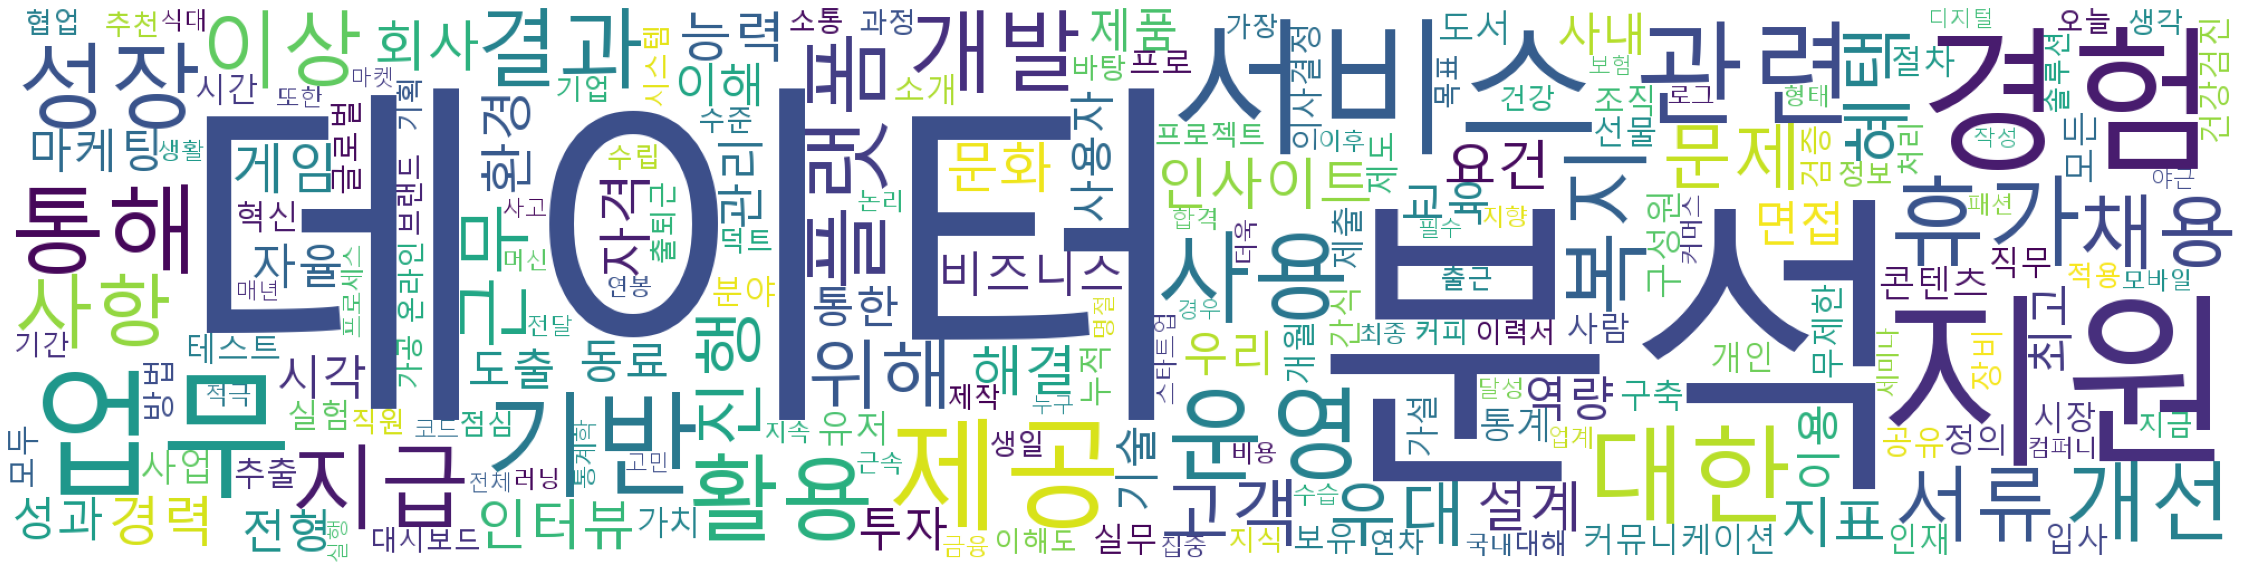

In [121]:
#wordcloud 만들기
wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',background_color="white",width=2000, height=500).generate_from_frequencies(word) # font 경로 개별적으로 설정해야함
plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [81]:
def showGraph(wordInfo):
    
    font_location = 'C:\Windows\Fonts\HANDotumB.ttf' # font 경로 설정
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)
    
    plt.xlabel('주요 단어',fontsize=20)
    plt.ylabel('빈도수')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')
    plt.rcParams["figure.figsize"] = (50,30)
    mpl.rcParams["font.size"] = 10

    plt.show()

In [77]:
word2= dict(count.most_common(50)) # 빈도 수 상위 50개로 word2 생성

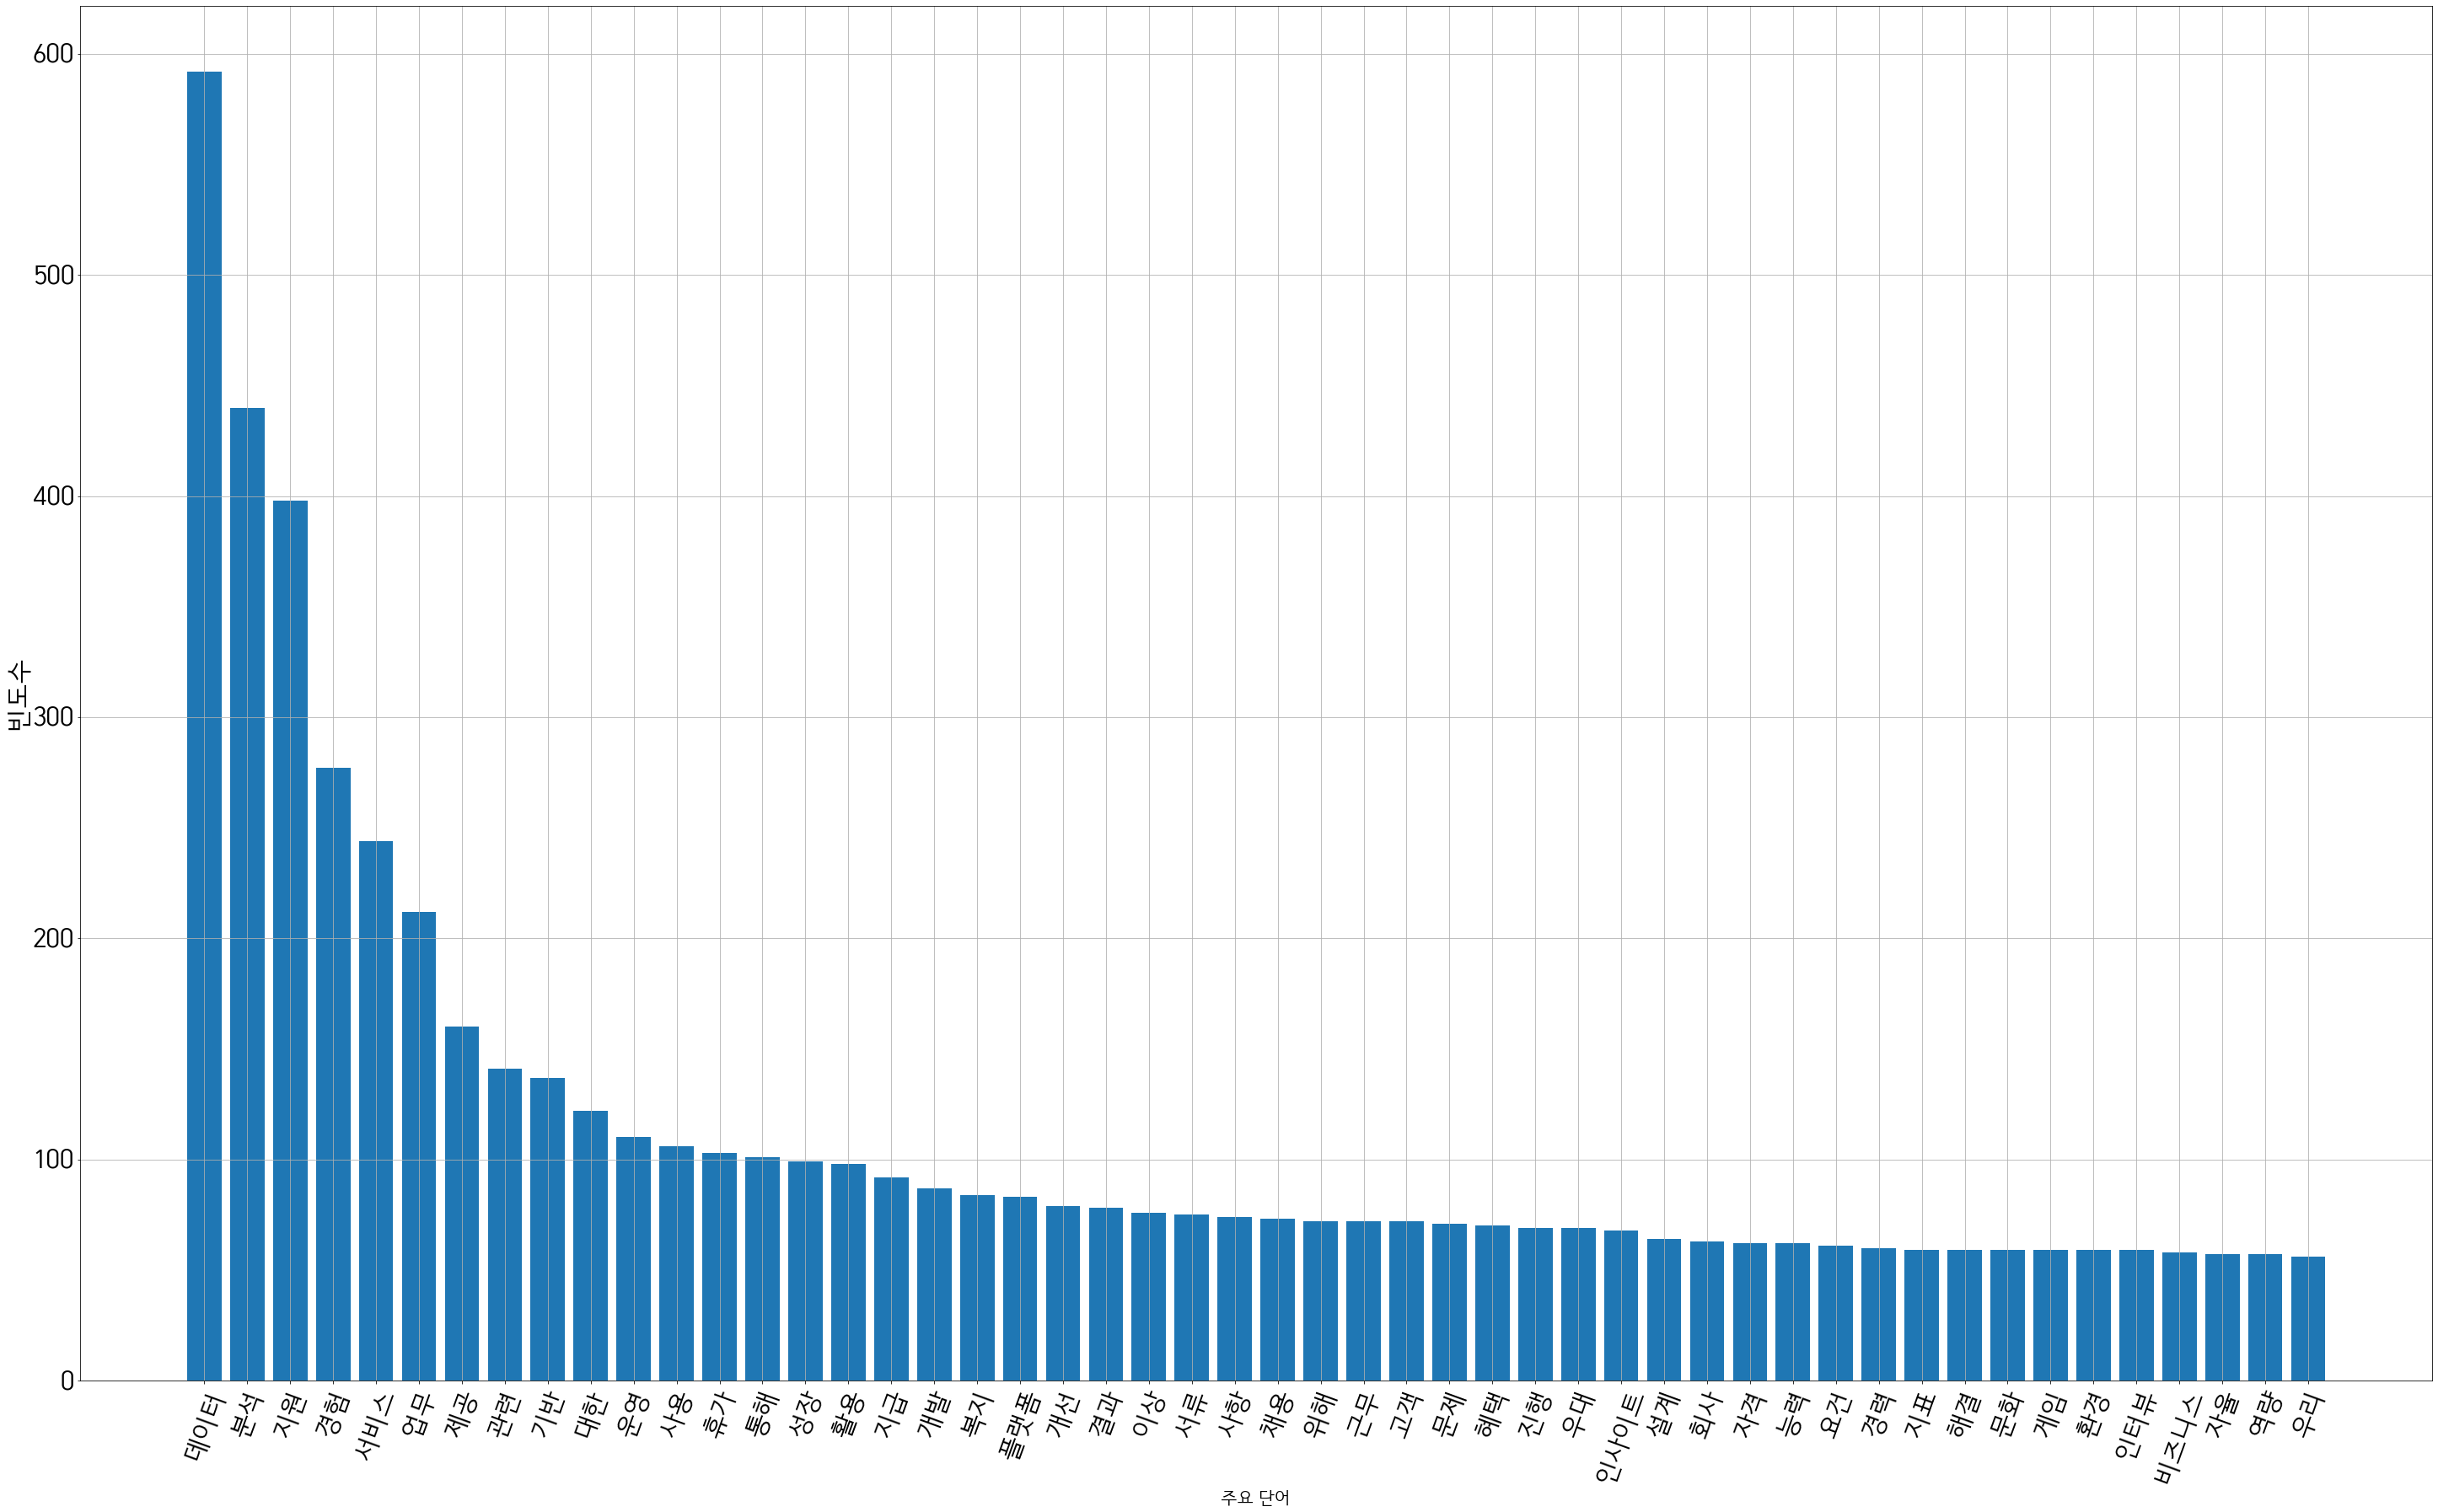

In [82]:
showGraph(word2)